# 1. Link colab với Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


# 2. Tạo thư mục data/split_data và chạy lệnh chia train test

In [2]:
import os
import glob
import random
import shutil

raw_data_path = "/content/gdrive/MyDrive/data/raw_data/images"
train_data_path = "/content/gdrive/MyDrive/data/split_data/train"
test_data_path = "/content/gdrive/MyDrive/data/split_data/test"

if not os.path.exists("/content/gdrive/MyDrive/data/split_data/"):
  os.mkdir("/content/gdrive/MyDrive/data/split_data/")

try:
  shutil.rmtree(train_data_path)
  shutil.rmtree(test_data_path)
except:
  pass

os.mkdir(train_data_path)
os.mkdir(test_data_path)

total_files = glob.glob(raw_data_path + "/*.jpg")
print("Tệp mẫu = ", total_files[0])
print("Tổng số tệp tin = ", len(total_files))

indices = list(range(len(total_files)))
train_indices = random.sample(indices, k = int(len(total_files)*0.9))
print("Tổng số tệp train = ", len(train_indices))

for i in indices:

    if (i in train_indices):
        # Copy to train
        shutil.copy(total_files[i], train_data_path + total_files[i].replace(raw_data_path,""))
        shutil.copy(total_files[i].replace("images","labels").replace(".jpg",".xml"),
                    train_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))
    else:
        # Copy to test
        shutil.copy(total_files[i], test_data_path + total_files[i].replace(raw_data_path, ""))
        shutil.copy(total_files[i].replace("images", "labels").replace(".jpg", ".xml"),
                    test_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))

Tệp mẫu =  /content/gdrive/MyDrive/data/raw_data/images/7.jpg
Tổng số tệp tin =  215
Tổng số tệp train =  193


# 3. Chuyển XML label sang CSV, file CSV lưu trong thư mục split_data

In [3]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

for directory in ['train','test']:
        image_path = os.path.join('/content/gdrive/MyDrive/data/split_data/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/gdrive/MyDrive/data/split_data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')

Successfully converted xml to csv.
Successfully converted xml to csv.


# 3. Tải TF Object Detection API vào thư mục models

In [ ]:
%cd /content/gdrive/MyDrive
!git clone https://github.com/tensorflow/models.git

/content/gdrive/MyDrive
Cloning into 'models'...
remote: Enumerating objects: 92938, done.
remote: Counting objects: 100% (2723/2723), done.
remote: Compressing objects: 100% (1801/1801), done.
remote: Total 92938 (delta 999), reused 2446 (delta 900), pack-reused 90215
Receiving objects: 100% (92938/92938), 617.30 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (66027/66027), done.
Updating files: 100% (3677/3677), done.


# 4. Biên dịch các protos - Bộ đệm giao thức (protobuf) là định dạng dữ liệu đa nền tảng nguồn mở và miễn phí được sử dụng để tuần tự hoá dữ liệu có cấu trúc.

In [4]:
%cd /content/gdrive/MyDrive/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/models/research


# 5. Cài đặt API

In [5]:
%cd /content/gdrive/MyDrive/models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/gdrive/MyDrive/models/research
Processing /content/gdrive/MyDrive/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 865.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.7 M

Test API

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2024-02-07 06:45:18.518418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 06:45:18.518466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 06:45:18.519946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 06:45:18.528295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 06:45:19.504105: W tensorflow/compiler/tf2

# 6. Chuyển từ CSV thành TFRecord

In [ ]:
%cd /content/gdrive/MyDrive/models/research
!git clone https://github.com/ViMinhChau/Tensorflow_tfrecord
!cp Tensorflow_tfrecord/generate_tfrecord.py .
!cp Tensorflow_tfrecord/label_map.txt /content/gdrive/MyDrive/data

if not os.path.exists("/content/gdrive/MyDrive/data/tfrecord_data/"):
  os.mkdir("/content/gdrive/MyDrive/data/tfrecord_data/")

!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/train --csv_input=/content/gdrive/MyDrive/data/split_data/train_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/train.record
!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/test --csv_input=/content/gdrive/MyDrive/data/split_data/test_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/test.record

/content/gdrive/MyDrive/models/research
Cloning into 'Tensorflow_tfrecord'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 20 (delta 7), reused 20 (delta 7), pack-reused 0
Receiving objects: 100% (20/20), done.
Resolving deltas: 100% (7/7), done.
2024-02-06 11:56:22.311002: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 11:56:22.311061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 11:56:22.312434: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 11:5

# 7. Tải xuống pretrain và cấu hình

In [ ]:
if not os.path.exists("/content/gdrive/MyDrive/pretrained"):
  os.mkdir("/content/gdrive/MyDrive/pretrained")

%cd /content/gdrive/MyDrive/pretrained
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# Unzip
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Cấu hình pipeline.config, label_map.txt nếu cần thiết

/content/gdrive/MyDrive/pretrained
--2024-02-06 11:58:02--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.145.207, 209.85.146.207, 209.85.147.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.145.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  68.5MB/s    in 0.3s    

2024-02-06 11:58:02 (68.5 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpo

Tải tệp nhãn object-detection.txt lên thư mục dữ liệu

In [ ]:
%cd /content/gdrive/MyDrive/models
!pip install -r /content/gdrive/MyDrive/models/research/Tensorflow_tfrecord/setup.txt
!pip install --upgrade opencv-python

/content/gdrive/MyDrive/models
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Succes

# 8. Train model

In [ ]:
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/model_main_tf2.py .

#train
!python model_main_tf2.py \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config\
--model_dir=/content/gdrive/MyDrive/output_model --alsologtostderr --num_train_steps=2000

/content/gdrive/MyDrive/models/research
2024-02-07 06:51:36.760807: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 06:51:36.811428: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 06:51:36.811950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 06:51:37.914566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-02-07 06:52:16.930243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https:

# 9. Export model

In [ ]:
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/exporter_main_v2.py .

!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/gdrive/MyDrive/output_model \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/content/gdrive/MyDrive/export_model

/content/gdrive/MyDrive/models/research
2024-02-07 11:05:13.178513: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 11:05:13.226435: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 11:05:13.226985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 11:05:14.291884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-02-07 11:05:17.973701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https:

In [6]:
!pip install tensorflow==2.12.0
!pip install matplotlib-venn
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.6 MB/s eta 0:00:00


# 10. Test model

In [7]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/content/gdrive/MyDrive/export_model/saved_model")

Các hàm inference

In [8]:
import cv2
def run_inference_for_single_image(model, image):

  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

/content/gdrive/MyDrive/models/research
Tải hình ảnh xong
Inference xong
Draw xong và lên ảnh


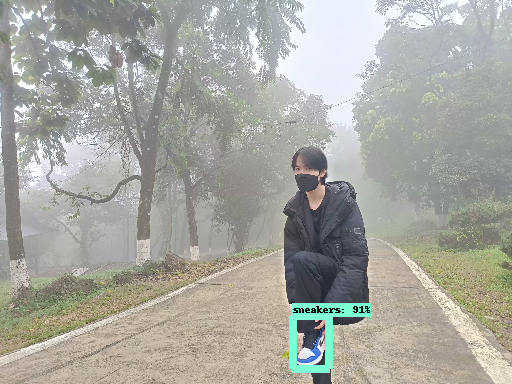

In [24]:
%cd /content/gdrive/MyDrive/models/research
category_index = label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/data/label_map.txt", use_display_name=True)

image_path = '/content/gdrive/MyDrive/data/split_data/train/300.jpg'
image_np = load_image_into_numpy_array(image_path)
print("Tải hình ảnh xong")
image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)
output_dict = run_inference_for_single_image(model, image_np)
print("Inference xong")
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
print("Draw xong và lên ảnh")
display(Image.fromarray(image_np))